In [1]:
from arms import *
from errors import *
from ATLUCB import *
from UCB import *
from alt_ATLUCB import *
from BayesianAlgo import *
from DoublingTrick import *
import numpy as np
import matplotlib.pyplot as plt
from time import time
import tqdm

# Paperlike experiments

## Linear MAB

In [12]:
n_arms = 1000
n = 200
horizon = (int)(15e4)
#algos = [('ATLUCB', ATLUCB), ('TTTS', TTTS), ('TTPS', TTPS), ('TTVS', TTVS)]
algos = [('ATLUCB', ATLUCB), ('UCB', UCB_MAP), ('TTTS', TTTS), ('TTTS2', TTTS2), ('Uniform', Uniform), ('DSH', DSH), ('DSH Naive', DSH_Naive), ('DSAR', DSAR), ('DSAR Naive', DSAR_Naive)]

# try to load for a warm restart
try:
    scores_linear1 = np.load('scores/scores_linear1.npy').item()
except FileNotFoundError:
    scores_linear1 = {}
    
try:  
    raw_scores_linear1 = np.load('scores/raw_scores_linear1.npy').item()
except:
    raw_scores_linear1 = {}
    
# if we decide to interrupt to running code, it saves the current state of all the stored scores
try:
    for algoname, algo in algos:
        t0 = time()
        if algoname not in scores_linear1.keys():
            try:
                # the number of runs to still do for this algo
                nalgo = n-len(raw_scores_linear1[algoname])
            except KeyError:
                # case of algo not loaded (ie 0 run already done)
                raw_scores_linear1[algoname] = []
                nalgo = n
            for i in tqdm.tqdm_notebook(range(nalgo), desc="Simulating {}".format(algoname)):
                    MAB = ToyMABLinear(n_arms)
                    t1 = time()
                    reco = algo(MAB, T=horizon)
                    raw_scores_linear1[algoname].append(minscore(MAB, reco))            
            scores_linear1[algoname] = np.mean(raw_scores_linear1[algoname], axis=0)
        
            del raw_scores_linear1[algoname]
            del reco
    
    # also saves the scores if we ran the whole algorithm without interrupting
    np.save('scores/raw_scores_linear1.npy', raw_scores_linear1)
    np.save('scores/scores_linear1.npy', scores_linear1)
    
except KeyboardInterrupt:
    print('Number of tries ran for %s : %d' %(algoname, len(raw_scores_linear1[algoname])))
    np.save('scores/raw_scores_linear1.npy', raw_scores_linear1)
    np.save('scores/scores_linear1.npy', scores_linear1)
    del reco
    del raw_scores_linear1

In [13]:
# load only
n_arms = 1000
n = 200
horizon = (int)(15e4)
algos = [('ATLUCB', ATLUCB), ('UCB', UCB_MAP), ('TTTS', TTTS), ('Uniform', Uniform), ('DSH', DSH), ('DSH Naive', DSH_Naive), ('DSAR', DSAR), ('DSAR Naive', DSAR_Naive)]

scores_linear1 = np.load('scores/scores_linear1.npy').item()

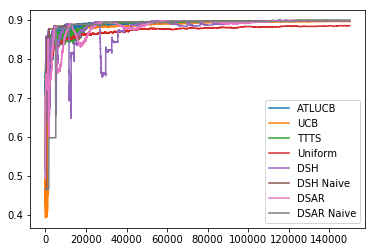

In [14]:
horizon_to_plot = (int)(15e4)
for algoname,_ in algos:
    plt.plot(scores_linear1[algoname][:horizon_to_plot], label=algoname)
plt.legend()
plt.savefig('figures/linear1.eps')
plt.show()

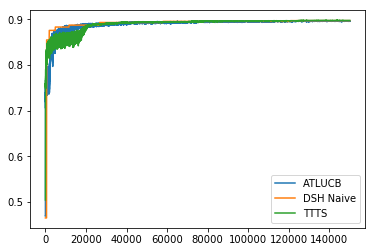

In [17]:
plt.figure(1)
horizon_to_plot = (int)(15e4)
algos_to_plot = ['ATLUCB', 'DSH Naive', 'TTTS']
for algoname in algos_to_plot:
    plt.plot(scores_linear1[algoname][:horizon_to_plot], label=algoname)
plt.legend()
plt.show()

In [6]:
del scores_linear1

## Polynomial MAB

In [7]:
n_arms = 1000
n = 200
horizon = (int)(15e4)
#algos = [('ATLUCB', ATLUCB), ('TTTS', TTTS), ('TTPS', TTPS), ('TTVS', TTVS)]
algos = [('ATLUCB', ATLUCB), ('UCB', UCB_MAP), ('TTTS2', TTTS2), ('Uniform', Uniform), ('DSH', DSH), ('DSH Naive', DSH_Naive), ('DSAR', DSAR), ('DSAR Naive', DSAR_Naive)]

# try to load for a warm restart
try:
    scores_poly1 = np.load('scores/scores_poly1.npy').item()
except FileNotFoundError:
    scores_poly1 = {}
    
try:  
    raw_scores_poly1 = np.load('scores/raw_scores_poly1.npy').item()
except:
    raw_scores_poly1 = {}
    
# if we decide to interrupt to running code, it saves the current state of all the stored scores
try:
    for algoname, algo in algos:
        t0 = time()
        if algoname not in scores_poly1.keys():
            try:
                # the number of runs to still do for this algo
                nalgo = n-len(raw_scores_poly1[algoname])
            except KeyError:
                # case of algo not loaded (ie 0 run already done)
                raw_scores_poly1[algoname] = []
                nalgo = n
            for i in tqdm.tqdm_notebook(range(nalgo), desc="Simulating {}".format(algoname)):
                    MAB = ToyMABpoly(n_arms)
                    t1 = time()
                    reco = algo(MAB, T=horizon)
                    raw_scores_poly1[algoname].append(minscore(MAB, reco))      
            scores_poly1[algoname] = np.mean(raw_scores_poly1[algoname], axis=0)
        
            del raw_scores_poly1[algoname]
            del reco
    
    # also saves the scores if we ran the whole algorithm without interrupting
    np.save('scores/raw_scores_poly1.npy', raw_scores_poly1)
    np.save('scores/scores_poly1.npy', scores_poly1)
    
except KeyboardInterrupt:
    print('Number of tries ran for %s : %d' %(algoname, len(raw_scores_poly1[algoname])))
    np.save('scores/raw_scores_poly1.npy', raw_scores_poly1)
    np.save('scores/scores_poly1.npy', scores_poly1)
    del raw_scores_poly1
    del reco

In [8]:
# load only
n_arms = 1000
n = 200
horizon = (int)(15e4)
#algos = [('ATLUCB', ATLUCB), ('TTTS', TTTS), ('TTPS', TTPS), ('TTVS', TTVS)]
algos = [('ATLUCB', ATLUCB), ('UCB', UCB_MAP), ('TTTS2', TTTS2), ('Uniform', Uniform), ('DSH', DSH), ('DSH Naive', DSH_Naive), ('DSAR', DSAR), ('DSAR Naive', DSAR_Naive)]

scores_poly1 = np.load('scores/scores_poly1.npy').item()

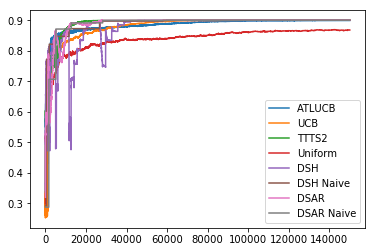

In [9]:
plt.figure(2)
horizon_to_plot = (int)(15e4)
for algoname,_ in algos:
    plt.plot(scores_poly1[algoname][:horizon_to_plot], label=algoname)
plt.legend()
plt.savefig('figures/poly1.eps')
plt.show()

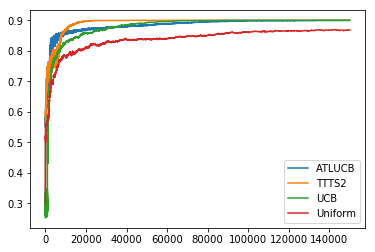

In [10]:
plt.figure(3)
algos_to_plot=['ATLUCB', 'TTTS2', 'UCB', 'Uniform']
for algoname in algos_to_plot:
    plt.plot(scores_poly1[algoname], label=algoname)
plt.legend()
plt.show()

In [11]:
del scores_poly1